# Import Package

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Mnits DataSets

In [2]:
mnit = keras.datasets.mnist

# Split Test and Train

In [3]:
(x_train,y_train),(x_test,y_test) = mnit.load_data()

11490434/11490434 [==============================] - 0s 0us/step


9


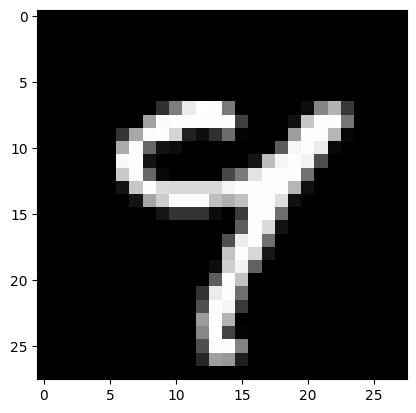

In [8]:
index = 54
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap="gray")

# 1) Model

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

# Compile

In [12]:
model.compile(optimizer='adam',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

# Summary

In [16]:
model.build(input_shape=(None,x_train.shape))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335114 (1.28 MB)
Trainable params: 335114 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train Model

In [18]:
hist = model.fit(x_train,y_train,epochs=300,batch_size=200,validation_data=(x_test,y_test))

Epoch 1/300
300/300 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.3540 - val_accuracy: 0.9787
Epoch 2/300
300/300 [==============================] - 1s 4ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.3338 - val_accuracy: 0.9811
Epoch 3/300
300/300 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.2946 - val_accuracy: 0.9802
Epoch 4/300
300/300 [==============================] - 1s 4ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.3438 - val_accuracy: 0.9808
Epoch 5/300
300/300 [==============================] - 1s 4ms/step - loss: 7.8084e-04 - accuracy: 0.9998 - val_loss: 0.3562 - val_accuracy: 0.9809
Epoch 6/300
300/300 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.3470 - val_accuracy: 0.9791
Epoch 7/300
300/300 [==============================] - 1s 4ms/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.4371 - val_accuracy: 0.

# Save

In [19]:
model.save("mnits.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load Model

In [26]:
model_load = keras.models.load_model("mnits.h5")

# History

In [27]:
acc = hist.history['accuracy']
acc_val = hist.history['val_accuracy']
loss = hist.history['loss']
loss_val = hist.history['val_loss']


# accuracy

In [34]:
accuracy = model.evaluate(x_test,y_test)
accuracy

313/313 [==============================] - 1s 2ms/step - loss: 1.5243 - accuracy: 0.9734


[1.5242788791656494, 0.9733999967575073]

# Plot

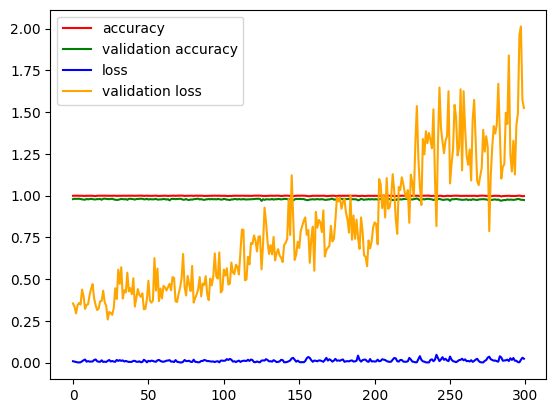

In [33]:
plt.plot(acc,color="red",label="accuracy")
plt.plot(acc_val,color="green",label="validation accuracy")
plt.plot(loss,color="blue",label="loss")
plt.plot(loss_val,color="orange",label="validation loss")
plt.legend()
plt.show()